In [ ]:
import pickle
arr=[i for i in range(1000)]
with open('file.pkl','wb') as f:
  pickle.dump(arr,f)
  pickle.dumps()


In [ ]:
with open('file.pkl','rb') as f:
  val=pickle.load(f)
  f.close()
print(val)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

##Quora question pair similarity dataset will be used
*Now we will be installing the kaggle api for downloding the dataset*



In [216]:
!pip install kaggle

In [217]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [218]:
!kaggle competitions download -c quora-question-pairs

100% 309M/309M [00:04<00:00, 80.1MB/s]
100% 309M/309M [00:04<00:00, 73.1MB/s]


In [219]:
!unzip quora-question-pairs.zip -d quora_question

Archive:  quora-question-pairs.zip
  inflating: quora_question/sample_submission.csv.zip  
  inflating: quora_question/test.csv  
  inflating: quora_question/test.csv.zip  
  inflating: quora_question/train.csv.zip  


In [220]:
%cd quora_question/

/content/quora_question


In [221]:
!unzip train.csv.zip
!unzip test.csv.zip

Archive:  train.csv.zip
  inflating: train.csv               
Archive:  test.csv.zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: r
new name: test1
  inflating: test1                   


#Now we will be importing all the necessary libraries


In [222]:
!pip install fuzzywuzzy
!pip install python-Levenshtein
!pip install wordcloud
!pip install gdown

from fuzzywuzzy import fuzz
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize 
import re
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
import xgboost as xgb
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [223]:
data=pd.read_csv('train.csv',header='infer',on_bad_lines='skip')
data.head(5)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


##*This is data cleaning and Exploratory data analysis part*

In [224]:
print(f"Total number of rows {data.shape[0]} and total number of columns is {data.shape[1]}")


Total number of rows 404290 and total number of columns is 6


In [317]:

#After cleaning we can check total number of null values
data.isna().sum()

is_duplicate              0
preprocessed_question1    0
preprocessed_question2    0
letter_count_q1           0
letter_count_q2           0
total_letter_count        0
word_count_question1      0
word_count_question2      0
diff_in_words             0
total_words               0
common_words_sim          0
fuzzy_ratio               0
fuzzy_partial_ratio       0
fuzzy_token_sort_ratio    0
fuzzy_token_set_ratio     0
cwc_min                   0
cwc_max                   0
dtype: int64

In [316]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404287 entries, 0 to 404289
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   is_duplicate            404287 non-null  int64  
 1   preprocessed_question1  404287 non-null  object 
 2   preprocessed_question2  404287 non-null  object 
 3   letter_count_q1         404287 non-null  int64  
 4   letter_count_q2         404287 non-null  int64  
 5   total_letter_count      404287 non-null  int64  
 6   word_count_question1    404287 non-null  int64  
 7   word_count_question2    404287 non-null  int64  
 8   diff_in_words           404287 non-null  int64  
 9   total_words             404287 non-null  int64  
 10  common_words_sim        404287 non-null  float64
 11  fuzzy_ratio             404287 non-null  float64
 12  fuzzy_partial_ratio     404287 non-null  float64
 13  fuzzy_token_sort_ratio  404287 non-null  float64
 14  fuzzy_token_set_rati

In [227]:
data.get('is_duplicate').value_counts()

0    255024
1    149263
Name: is_duplicate, dtype: int64

In [ ]:
sns.histplot(data=data,x='is_duplicate',bins=2,hue='is_duplicate')
plt.show()

In [1]:
#This can have thress types of data
#puncuatation marks removal
#Html tag removals
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase
#English stop words are imported
#Stemmer has also been instantiated but not used
stop_word=stopwords.words('english')
def preprocessing(sentence):
  #In first phase we will do the decontraction of the words
  sentence=decontracted(sentence)
  #We will remove any html tags
  sentence=BeautifulSoup(sentence,'lxml').get_text()
  #Now we will remove the special characters
  sentence=re.sub('[^a-zA-Z]+',' ',sentence)
  #Also remove the number we have
  sentence=re.sub('\d+','',sentence)
  #Now we will remove
  sentence=' '.join([word.lower() for word in sentence.split() if word.lower() not in stop_word])
  return sentence

NameError: ignored

In [247]:
from preprocessing_text_new1_1 import preprocessing
#Test case
sentence=""" not this these after before Find the remainder _____  hbcjhxbv hsfjshd jkshdjkfbabgsd thinks when [math]23^{24}[/math] ____ not fought very hard"""
preprocessing(sentence)

'not find remainder hbcjhxbv hsfjshd jkshdjkfbabgsd think math math not fight hard'

In [ ]:
#This is an import code for regex expression
def dashrepl(matchobj):
    print(matchobj.group(0))
    if matchobj.group(0) == '-': return ' '
    else: return '-'
re.sub('({})'.format('|'.join(contractions_dict.keys())),dashrepl, 'pro----gramm-files don\'t his',)

In [ ]:
#Now we will be applying the txt preproccesssing
data['preprocessed_question1']=data.get('question1').apply(preprocessing)
data['preprocessed_question2']=data.get('question2').apply(preprocessing)
data.head(10)

In [251]:
#small basic features
data['letter_count_q1']=data.get('preprocessed_question1').apply(len)
data['letter_count_q2']=data.get('preprocessed_question2').apply(len)
data['total_letter_count']=data.get('letter_count_q1')+data.get('letter_count_q2')
data.head(5)

,id,qid1,qid2,question1,question2,is_duplicate,preprocessed_question1,preprocessed_question2,letter_count_q1,letter_count_q2,total_letter_count
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,step step guide invest share market india,step step guide invest share market,41,35,76
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,story kohinoor koh noor diamond,would happen indian government stole kohinoor ...,31,67,98
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,can increase speed internet connection using vpn,can internet speed increase hack dns,48,36,84
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,mentally lonely can solve,find remainder math math divide,25,31,56
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,one dissolve water quikly sugar salt methane c...,fish would survive salt water,60,29,89


In [ ]:
sns.kdeplot(data=data,x='letter_count_q1',hue='is_duplicate',multiple='stack')
plt.show()
sns.kdeplot(data=data,x='letter_count_q2',hue='is_duplicate',multiple='stack')
plt.show()

In [252]:
data['word_count_question1']=data.get('preprocessed_question1').apply(lambda x:len(x.split()))
data['word_count_question2']=data.get('preprocessed_question2').apply(lambda x:len(x.split()))
data.head(5)

,id,qid1,qid2,question1,question2,is_duplicate,preprocessed_question1,preprocessed_question2,letter_count_q1,letter_count_q2,total_letter_count,word_count_question1,word_count_question2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,step step guide invest share market india,step step guide invest share market,41,35,76,7,6
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,story kohinoor koh noor diamond,would happen indian government stole kohinoor ...,31,67,98,5,10
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,can increase speed internet connection using vpn,can internet speed increase hack dns,48,36,84,7,6
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,mentally lonely can solve,find remainder math math divide,25,31,56,4,5
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,one dissolve water quikly sugar salt methane c...,fish would survive salt water,60,29,89,10,5


In [253]:
data['diff_in_words']=abs(data.get('word_count_question1')-data.get('word_count_question2'))
data['total_words']=data.get('word_count_question1')+data.get('word_count_question2')
data.head(5)

,id,qid1,qid2,question1,question2,is_duplicate,preprocessed_question1,preprocessed_question2,letter_count_q1,letter_count_q2,total_letter_count,word_count_question1,word_count_question2,diff_in_words,total_words
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,step step guide invest share market india,step step guide invest share market,41,35,76,7,6,1,13
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,story kohinoor koh noor diamond,would happen indian government stole kohinoor ...,31,67,98,5,10,5,15
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,can increase speed internet connection using vpn,can internet speed increase hack dns,48,36,84,7,6,1,13
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,mentally lonely can solve,find remainder math math divide,25,31,56,4,5,1,9
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,one dissolve water quikly sugar salt methane c...,fish would survive salt water,60,29,89,10,5,5,15


In [ ]:
sns.kdeplot(data=data,x='diff_in_words',hue='is_duplicate')
plt.show()
sns.kdeplot(data=data,x='total_words',hue='is_duplicate')
plt.show()

In [254]:
def jaccard_index(s1,s2):
  A=set(s1.split())
  B=set(s2.split())
  try:
    return len(A.intersection(B))/len(A.union(B))
  except ZeroDivisionError:
    return 0
data['common_words_sim']=data.apply(lambda x:jaccard_index(x.get('preprocessed_question1'),x.get('preprocessed_question2')),axis=1)

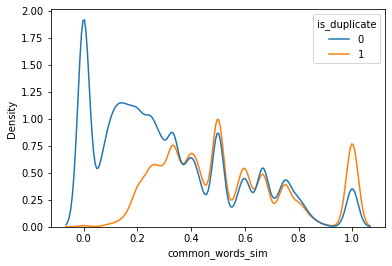

In [ ]:
sns.kdeplot(data=data,x="common_words_sim",hue='is_duplicate')
plt.show()

In [255]:
#Calcualtion of the fuzzy ratio
data['fuzzy_ratio']=data.apply(lambda x:fuzz.ratio(x.get('preprocessed_question1'),x.get('preprocessed_question2')),axis=1)

#Calculation of the fuzzy partial ratio i.e we calculate fuzzy ration w.rt to shorter string to bigger string

data['fuzzy_partial_ratio']=data.apply(lambda x:fuzz.partial_ratio(x.get('preprocessed_question1'),x.get('preprocessed_question2')),axis=1)
#Calculation of fuzzy token sort ratio

data['fuzzy_token_sort_ratio']=data.apply(lambda x:fuzz.token_sort_ratio(x.get('preprocessed_question1'),x.get('preprocessed_question2')),axis=1)

#calculation of fuzzy token set ratio

data['fuzzy_token_set_ratio']=data.apply(lambda x:fuzz.token_set_ratio(x.get('preprocessed_question1'),x.get('preprocessed_question2')),axis=1)

#CWC min and CWC max


In [256]:
def cwc(s1,s2,func):
  A=set(s1.split())
  B=set(s2.split())
  try:
    return len(A.intersection(B))/func(len(A),len(B))
  except ZeroDivisionError:
    return 0

data['cwc_min']=data.apply(lambda x:cwc(x.get('preprocessed_question1'),x.get('preprocessed_question2'),lambda x,y:min(x,y)),axis=1)
data['cwc_max']=data.apply(lambda x:cwc(x.get('preprocessed_question1'),x.get('preprocessed_question2'),lambda x,y:max(x,y)),axis=1)


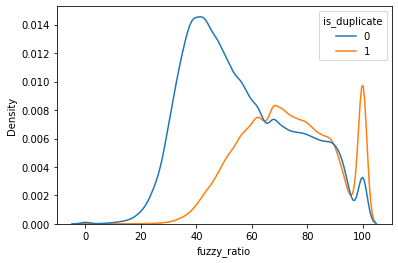

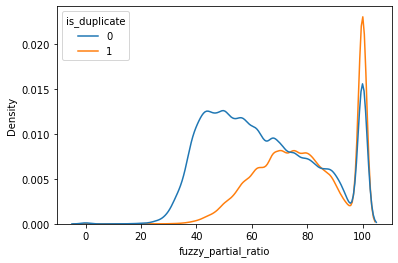

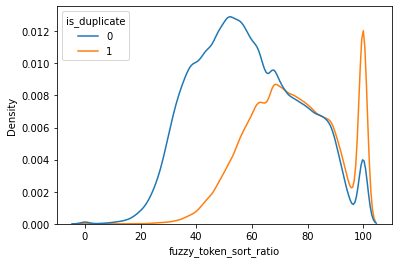

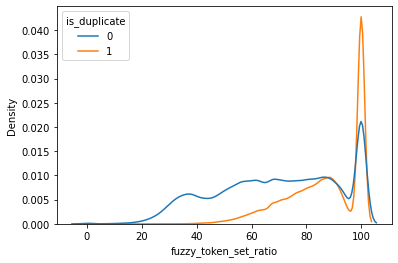

In [258]:
#Plot of the fuzzy ratio
sns.kdeplot(data=data,x='fuzzy_ratio',hue='is_duplicate')
plt.show()
#Plot of the fuzzy partial ratio
sns.kdeplot(data=data,x='fuzzy_partial_ratio',hue='is_duplicate')
plt.show()
#Plot of the fuzzy token sort ratio
sns.kdeplot(data=data,x='fuzzy_token_sort_ratio',hue='is_duplicate')
plt.show()
#Plot of the fuzzy token set ratio
sns.kdeplot(data=data,x='fuzzy_token_set_ratio',hue='is_duplicate')
plt.show()

In [ ]:
sns.kdeplot(data=data,x='cwc_min',hue='is_duplicate')
plt.show()
sns.kdeplot(data=data,x='cwc_max',hue='is_duplicate')
plt.show()

In [259]:
#In this code cell we are scaling the fuzzy feature from 0 to 100 to 0 to 1
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
data[['fuzzy_ratio','fuzzy_partial_ratio','fuzzy_token_sort_ratio' ,'fuzzy_token_set_ratio']] =\
      scaler.fit_transform(data[['fuzzy_ratio','fuzzy_partial_ratio','fuzzy_token_sort_ratio','fuzzy_token_set_ratio']])

In [261]:
data.head(5)

,id,qid1,qid2,question1,question2,is_duplicate,preprocessed_question1,preprocessed_question2,letter_count_q1,letter_count_q2,...,word_count_question2,diff_in_words,total_words,common_words_sim,fuzzy_ratio,fuzzy_partial_ratio,fuzzy_token_sort_ratio,fuzzy_token_set_ratio,cwc_min,cwc_max
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,step step guide invest share market india,step step guide invest share market,41,35,...,6,1,13,0.833333,0.92,1.00,0.92,1.00,1.000000,0.833333
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,story kohinoor koh noor diamond,would happen indian government stole kohinoor ...,31,67,...,10,5,15,0.363636,0.59,0.94,0.59,0.89,0.800000,0.400000
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,can increase speed internet connection using vpn,can internet speed increase hack dns,48,36,...,6,1,13,0.444444,0.55,0.61,0.71,0.86,0.666667,0.571429
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,mentally lonely can solve,find remainder math math divide,25,31,...,5,1,9,0.000000,0.32,0.36,0.29,0.27,0.000000,0.000000
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,one dissolve water quikly sugar salt methane c...,fish would survive salt water,60,29,...,5,5,15,0.153846,0.43,0.52,0.40,0.51,0.400000,0.200000


In [262]:
#We are dropping the unnecessary levels from the dataframe 
data.drop(['qid1','qid2','question1','question2','id'],axis=1,inplace=True,)

In [263]:
data.to_csv('preprocessed_text.csv',index=False)

In [ ]:
del data

In [333]:
data.columns

Index(['is_duplicate', 'preprocessed_question1', 'preprocessed_question2',
       'letter_count_q1', 'letter_count_q2', 'total_letter_count',
       'word_count_question1', 'word_count_question2', 'diff_in_words',
       'total_words', 'common_words_sim', 'fuzzy_ratio', 'fuzzy_partial_ratio',
       'fuzzy_token_sort_ratio', 'fuzzy_token_set_ratio', 'cwc_min',
       'cwc_max'],
      dtype='object')

In [ ]:
pd.read_csv('preprocessed_text.csv',header='infer').head(5)

In [ ]:
from sklearn.manifold import TSNE
for p in [10,15,20,25,30,35,40,45]:
  tsne=TSNE(n_components=2,perplexity=p,n_iter=300,n_iter_without_progress=50,verbose=1)
  rows=['letter_count_q1','letter_count_q2','word_count_question1','word_count_question2','diff_in_words','total_words','common_words_sim','fuzzy_ratio','fuzzy_partial_ratio','fuzzy_token_sort_ratio','fuzzy_token_set_ratio','cwc_min','cwc_max']
  data_points=tsne.fit_transform(visualize[rows].iloc[:5000])
  sns.scatterplot(x=data_points[:,0],y=data_points[:,1],hue=data['is_duplicate'].iloc[:5000])
  plt.show()

In [ ]:
#We will create the text corpus
text_corpus=np.hstack([data.get('preprocessed_question1'),data.get('preprocessed_question2')])
text_corpus=list(np.unique(text_corpus))

In [ ]:
#Now we will be seeing wordcloud of is_duplicate==1
def create_corpus(data_frame,cols,hue,):
  assert hue in data_frame.columns
  text_corpus=dict()
  for label in data_frame.get(hue).unique():
    text_corpus[str(label)]=set(np.hstack([data_frame[data_frame[hue]==label][col] for col in cols]))
  return text_corpus

In [ ]:
def Show_Cloud(text_corpus,name=None,mask=None,**kwargs):
  text=''
  if type(text_corpus)==list or type(text_corpus)==set:
    text=' '.join([sent for sent in text_corpus])
  if type(text_corpus)==str:
    text=text_corpus
  #Text courpus is ready 
  #Instantiating the word Courpus
  wc=WordCloud(width=400,height=200,mask=None if mask is None else mask,background_color="white",collocations=False).generate(text)
  plt.figure(figsize=(8,8),dpi=150)
  plt.imshow(wc,interpolation='bilinear')
  plt.axis('off')
  if name is not None:
    wc.to_file(str(name))

In [ ]:
text_corpus=create_corpus(data,['preprocessed_question1','preprocessed_question2'],'is_duplicate')

In [ ]:
Show_Cloud(text_corpus['0'],name='true_question.png')

In [ ]:
Show_Cloud(text_corpus['1'],name='false_question.png')

In [ ]:
data.to_csv("train_preprocessed.csv")


In [264]:
def general_corpus(data,cols):
  text=set(np.hstack([data.get(col) for col in cols]))
  return text

In [265]:
text_corpus=list(general_corpus(data,['preprocessed_question1','preprocessed_question2']))

In [268]:
text_corpus

['',
 'should progress want know veda beginning',
 'demonetization policy pm modi failure',
 'whey protein cause kidney stone young adult',
 'suzlon energy worth accumulate level',
 'can global warming completely stop',
 'effective nuclear charge sodium find effective nuclear charge sodium',
 'will simple plastic case screen protector protect iphone',
 'think kinnect focus social medium platform purely brand brand lover',
 'social work major plan open private practice one day can plan future today',
 'reason anemia',
 'microsoft certification like mcse mc aid getting technical support job microsoft',
 'cope constant change shift work long hours times without sleep',
 'best short hair style face',
 'qualification employer dubai seek civil engineering',
 'u s election really going happen latino trump win',
 'make nose smaller',
 'graphene use cnt',
 'chief minister chandigarh',
 'set max repeatedly telecast sooryavansham movie india',
 'beautiful zoo world',
 'site online sql practice',


In [270]:
import pickle
#Now we have the vidf associated with all the vectors
vectorizer=TfidfVectorizer(stop_words=None,ngram_range=(1,1),lowercase=True,)
vectorizer.fit(text_corpus)
word2idf=dict(zip(vectorizer.get_feature_names(),vectorizer.idf_))

#after that we will save wor2idf as pickle file

with open('word2idf.pkl','wb') as f:
  pickle.dump(word2idf,f)
  f.close()
with open('word2idf.pkl','rb') as f:
  word2idf_loaded=pickle.load(f)
  f.close()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [273]:
word2idf['not']

3.881324561273969

In [ ]:
!gdown --id 0B7XkCwpI5KDYNlNUTTlSS21pQmM

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM
To: /content/quora_question/GoogleNews-vectors-negative300.bin.gz
100% 1.65G/1.65G [00:08<00:00, 191MB/s]


In [ ]:
import gensim
from gensim.models import KeyedVectors
model=KeyedVectors.load_word2vec_format('/content/quora_question/GoogleNews-vectors-negative300.bin.gz',binary=True)
word_vec=model.wv

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  after removing the cwd from sys.path.


In [ ]:
word_vec

In [307]:
from tqdm import tqdm
import numpy as np
def sentence_vector(s1:list):
  sent_vectors=[]
  for q1 in tqdm(s1):
    #Now i have the q1
    mean_vectors=np.zeros(shape=(300,))
    for word in q1.split():
      #This is the calculation of the word vectors
        try:
          vector=word_vec[str(word)]
          pass
        except KeyError:
          vector=np.zeros(shape=(300,))

        #This is the calculation of idf values
        try:
          pass
          idf=word2idf[str(word)]
        except KeyError:
          idf=0
        #print(idf,word)
        mean_vectors+=vector*idf
    mean_vector=mean_vectors/len(q1.split())
    sent_vectors.append(mean_vector)
  return sent_vectors
  #print(mean_vector)

In [308]:
v1=sentence_vector(['why rubies are not found in india','current leader russia'])

100%|██████████| 2/2 [00:00<00:00, 1537.50it/s]


In [309]:
np.dot(v1[0],v1[1])/(np.linalg.norm(v1[0])*np.linalg.norm(v1[1]))

0.22040291653409302

In [311]:
sent_vectors=sentence_vector(data['preprocessed_question1'])

100%|██████████| 404287/404287 [00:31<00:00, 12965.77it/s]


In [314]:
sent_vectors_q2=sentence_vector(data['preprocessed_question2'])

100%|██████████| 404287/404287 [00:31<00:00, 12911.25it/s]


In [312]:
import csv

cols = ["q1_"+str(i) for i in range(len(sent_vectors[0]))]

with open('df_q1.csv', 'w') as f:

    # using csv.writer method from CSV package
    write = csv.writer(f)

    write.writerow(cols)
    write.writerows(sent_vectors)
f.close()

del sent_vectors


In [315]:
import csv

cols = ["q2_"+str(i) for i in range(len(sent_vectors_q2[0]))]

with open('df_q2.csv', 'w') as f:

    # using csv.writer method from CSV package
    write = csv.writer(f)

    write.writerow(cols)
    write.writerows(sent_vectors_q2)
f.close()

del sent_vectors_q2


In [ ]:
#We are pickling the word vectors
with open('word_vector.pkl','wb') as f:
  pickle.dump(word_vec,f)
  f.close()

In [ ]:
import pickle
with open('/content/drive/MyDrive/word_vector.pkl','rb') as f:
    word_vec=pickle.load(f)
    f.close()
with open('/content/drive/MyDrive/word2idf.pkl','rb') as f:
    word2idf=pickle.load(f)m
    f.close()


In [345]:
chunk_size=10000
header=True
batch=1
for df1,df2 in zip(pd.read_csv('df_q1.csv',chunksize=chunk_size),pd.read_csv('df_q2.csv',chunksize=chunk_size)):
  df=pd.concat([df1,df2],axis=1,)
  df['cosine_similarity']=df.apply(lambda x:1-distance.cosine(x[:300],x[300:]),axis=1)
  df.to_csv('q1_q2_vectors.csv',index=False,header=header,mode='a+')
  header=False
  del df
  print('Index {}'.format(batch))
  batch+=1

/usr/local/lib/python3.7/dist-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


Index 1
Index 2
Index 3
Index 4
Index 5
Index 6
Index 7
Index 8
Index 9
Index 10
Index 11
Index 12
Index 13
Index 14
Index 15
Index 16
Index 17
Index 18
Index 19
Index 20
Index 21
Index 22
Index 23
Index 24
Index 25
Index 26
Index 27
Index 28
Index 29
Index 30
Index 31
Index 32
Index 33
Index 34
Index 35
Index 36
Index 37
Index 38
Index 39
Index 40
Index 41


In [349]:
size=100000
sim=pd.read_csv('q1_q2_vectors.csv',nrows=size,usecols=['cosine_similarity'])

In [365]:
del sim

In [358]:
y_label=data['is_duplicate'].iloc[:size]
y_label.values

array([0, 0, 0, ..., 1, 0, 0])

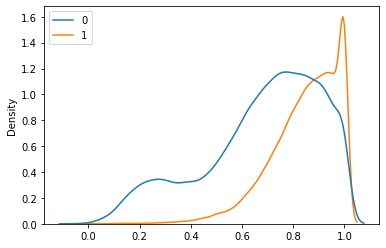

In [364]:
sns.kdeplot(x=sim.values.flatten(),hue=y_label.values)

In [366]:
import os
import sqlite3
import sqlalchemy
if not os.path.isfile('train.db'):
  engine=sqlalchemy.create_engine('sqlite:///train.db')
  chunk_size=10000
  count=0
  batch=1
  header=True
  for df1,df2 in zip(pd.read_csv('preprocessed_text.csv',chunksize=chunk_size),pd.read_csv('q1_q2_vectors.csv',chunksize=chunk_size)):
    df=pd.concat([df1,df2],axis=1)
    df.to_sql('train',engine,if_exists='append',)
    del df
    print("Index {}".format(batch))
    batch+=1

Index 1
Index 2
Index 3
Index 4
Index 5
Index 6
Index 7
Index 8
Index 9
Index 10
Index 11
Index 12
Index 13
Index 14
Index 15
Index 16
Index 17
Index 18
Index 19
Index 20
Index 21
Index 22
Index 23
Index 24
Index 25
Index 26
Index 27
Index 28
Index 29
Index 30
Index 31
Index 32
Index 33
Index 34
Index 35
Index 36
Index 37
Index 38
Index 39
Index 40
Index 41


In [367]:
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by db_file
    :param db_file: database file
    :return: Connection object or None
    """
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
 
    return None


def checkTableExists(dbcon):
    cursr = dbcon.cursor()
    str = "select name from sqlite_master where type='table'"
    table_names = cursr.execute(str)
    print("Tables in the databse:")
    tables =table_names.fetchall() 
    print(tables[0][0])
    return(len(tables))

In [369]:
read_db = 'train.db'
conn_r = create_connection(read_db)
checkTableExists(conn_r)

Tables in the databse:
train


1

In [370]:
import os
import sqlite3
from sqlalchemy import create_engine
import pandas as pd
read_db = 'train.db'
conn_r = create_connection(read_db)
data=pd.read_sql_query('''SELECT * FROM train LIMIT 100001''',conn_r)
conn_r.commit()
conn_r.close()
del conn_r

In [ ]:
data.head(5)

In [372]:
y_label=data['is_duplicate']
data.head(5)
data.drop(['index','is_duplicate','preprocessed_question1','preprocessed_question2'],axis=1,inplace=True)
for col in data.columns:
  data[col]=pd.to_numeric(data[col])

In [373]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(data, y_label, stratify=y_label, test_size=0.3)
print("Number of data points in train data :",X_train.shape)
print("Number of data points in test data :",X_test.shape)

Number of data points in train data : (70000, 615)
Number of data points in test data : (30001, 615)


In [375]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, log_loss
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4

d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)

xgdmat = xgb.DMatrix(X_train,y_train)


[0]	train-logloss:0.687853	valid-logloss:0.688039
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[10]	train-logloss:0.644847	valid-logloss:0.64559
[20]	train-logloss:0.613949	valid-logloss:0.615208
[30]	train-logloss:0.590972	valid-logloss:0.592647
[40]	train-logloss:0.573533	valid-logloss:0.575677
[50]	train-logloss:0.559955	valid-logloss:0.562594
[60]	train-logloss:0.549103	valid-logloss:0.552259
[70]	train-logloss:0.54039	valid-logloss:0.544014
[80]	train-logloss:0.533371	valid-logloss:0.537412
[90]	train-logloss:0.527543	valid-logloss:0.532044
[100]	train-logloss:0.522608	valid-logloss:0.527445
[110]	train-logloss:0.518132	valid-logloss:0.523266
[120]	train-logloss:0.514119	valid-logloss:0.519618
[130]	train-logloss:0.510622	valid-logloss:0.516535
[140]	train-logloss:0.507181	valid-logloss:0.513425
[150]	train-logloss:0.504257	valid-logloss:0.510892
[160]	train-logloss:0.501564	v

NameError: ignored

In [385]:
pickle.dump(bst,open('xgbmodel.pkl','wb'))


In [386]:
cst=pickle.load(open('xgbmodel.pkl','rb'))

In [387]:
predict_y = cst.predict(d_test,)
print("The test log loss is:",log_loss(y_test, predict_y, labels=[0,1], eps=1e-15))

The test log loss is: 0.47648786563755435


In [379]:
(list(map(int,predict_y>.5))==y_test).sum()/len(y_test)


0.7541081963934535

In [ ]:
from

In [418]:
from preprocessing_text_new1_1 import preprocessing
from sentence_vectors_new import sentence_vector
from scipy.spatial.distance import cosine
def jaccard_index(s1,s2):
  A=set(s1.split())
  B=set(s2.split())
  try:
    return len(A.intersection(B))/len(A.union(B))
  except ZeroDivisionError:
    return 0
def cwc(s1,s2,func):
  A=set(s1.split())
  B=set(s2.split())
  try:
    return len(A.intersection(B))/func(len(A),len(B))
  except ZeroDivisionError:
    return 0
def process_query(q1,q2,model,word2idf,word_vec):
  features=[]
  #Preprocessing the text such as making it lower case,removing stop words decontraction and html tags
  q1=preprocessing(q1)
  q2=preprocessing(q2)
  #Processing letter_count_q1 and_letter_count q2
  letter_count_q1=len(q1)
  letter_count_q2=len(q2)
  total_letter_count=len(q1)+len(q2)
  features.extend([letter_count_q1,letter_count_q2,total_letter_count])
  #Processing_word count_q1 and q2 and diff_words and total_words
  word_count_q1=len(q1.strip().split())
  word_count_q2=len(q2.strip().split())
  diff_in_words=abs(word_count_q1-word_count_q2)
  total_words=word_count_q1+word_count_q2
  features.extend([word_count_q1,word_count_q2,diff_in_words,total_words])
  #jaccard similarity
  features.extend([jaccard_index(q1,q2)])
  #Now we will create the fuzzy features and scaling them between 0 to 1
  fuzzy_ratio=fuzz.ratio(q1,q2)/100
  fuzzy_partial_ratio=fuzz.partial_ratio(q1,q2)/100
  fuzzy_token_sort_ratio=fuzz.token_sort_ratio(q1,q2)/100
  fuzzy_token_set_ratio=fuzz.token_set_ratio(q1,q2)/100
  features.extend([fuzzy_ratio,fuzzy_partial_ratio,fuzzy_token_sort_ratio,fuzzy_token_set_ratio])

  #Cwc index will be user
  cwc_min=cwc(q1,q2,lambda x,y:min(x,y))
  cwc_max=cwc(q1,q2,lambda x,y:max(x,y))
  features.extend([cwc_min,cwc_max])
  # we will be creating the feature vector for q1 and then q1
  q1_mean_vector=sentence_vector([q1],word2idf,word_vec)[0]
  features.extend(q1_mean_vector)
  #Calculation for word 2
  q2_mean_vector=sentence_vector([q2],word2idf,word_vec)[0]
  features.extend(q2_mean_vector)
  #pushin cosine similarity value
  #print(q1_mean_vector)
  features.extend([1-cosine(list(q1_mean_vector),list(q2_mean_vector))])
  return features

In [399]:
cols=X_train.columns

In [38]:
import pickle
with open('word2idf.pkl','rb') as f:
  word2idf=pickle.load(f)
  f.close()
with open('word_vector.pkl','rb') as f:
  word_vec=pickle.load(f)
  f.close()

In [ ]:
cols

In [432]:
sent1="who were the freedom fighters fought during the indian independence"
sent2="how to install windows in macbook"
test_query=process_query(sent1,sent2,None,word2idf,word_vec)
print(len(test_query))
d_test = xgb.DMatrix(pd.DataFrame(np.array(test_query).reshape(1,-1),columns=cols))
predict_y = bst.predict(d_test)
predict_y

Running


100%|██████████| 1/1 [00:00<00:00, 2239.35it/s]


Running


100%|██████████| 1/1 [00:00<00:00, 1377.89it/s]

615


array([0.00433627], dtype=float32)

In [158]:
import nltk
from nltk.corpus import wordnet as wn
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
#This can have thress types of data
#puncuatation marks removal
#Html tag removals
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase
#English stop words are imported
#Stemmer has also been instantiated but not used


def preprocessing(sentence):
  try:
    stop_word=stopwords.words('english')
  except:
    nltk.download('stopwords')
    stop_word=stopwords.words('english')
    
  nltk.download('wordnet')
  #In first phase we will do the decontraction of the words
  sentence=decontracted(sentence)
  #We will remove any html tags
  sentence=BeautifulSoup(sentence,'lxml').get_text()
  #Now we will remove the special characters
  sentence=re.sub('[^a-zA-Z]+',' ',sentence)
  #Also remove the number we have
  sentence=re.sub('\d+','',sentence)
  #Now we will remove
  sentence=sentence.lower()
  sentence=' '.join([wn.morphy(word) if wn.morphy(word)!=None else word for word in sentence.split() if word not in stop_word])
  return sentence

In [159]:
preprocessing('harhsjghdfjhsbgd hsdhjhdg')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


'harhsjghdfjhsbgd hsdhjhdg'

In [2]:
import pickle
pickle.dump(word_vec,open('word_vec.pkl','wb'),)

NameError: ignored